In [35]:
library(dplyr)
library(circlize)
library(DT)
library(dplyr)
library(tibble)
library(ComplexHeatmap)
library(RColorBrewer)

In [36]:
library(ggplot2)

In [37]:
scale_rows <- function (x) 
{
    m = apply(x, 1, mean, na.rm = T)
    s = apply(x, 1, sd, na.rm = T)
    return((x - m)/s)
}


### load the data

In [39]:
phe_128 <- read.table('128sample.allphe.txt',header=T,sep="\t")

In [40]:
rownames(phe_128) <- phe_128$sample

In [41]:
snp_mutation <- read.table('snp_mutation_matrix.txt',header=T,sep="\t",row.names = 1,colClasses=c("character"))
colnames(snp_mutation) <- paste0("9D",(colnames(snp_mutation) %>% strsplit("_") %>% sapply(function(x) x[[1]])))

In [42]:
snp_mutation_113 <- snp_mutation[,intersect(phe_128$sample,colnames(snp_mutation))]

In [43]:
snp_mutation_all <- snp_mutation[,intersect(phe_128$sample,colnames(snp_mutation))]

In [44]:
cacner_gene <- read.table('/disk1/pengweixing/database/cancergene/merge.cancer.gene2',header=F)

In [45]:
phe_113 <- phe_128[intersect(phe_128$sample,colnames(snp_mutation)),]

In [46]:
phe_113$group %>% table()

.
    High      Low negative 
      42       45       26 

### re-order mutation by its incidence

In [47]:
snp_mutation_all2 = snp_mutation_all
snp_mutation_all2[snp_mutation_all2>0] = 1
snp_mutation_all2[!snp_mutation_all2>0] = 0
snp_mutation_all2 <- mutate_all(snp_mutation_all2, function(x) as.numeric(x))
temp <- rowSums(snp_mutation_all2)
snp_mutation_all <- snp_mutation_all[order(temp,decreasing = TRUE),]

In [48]:
head(snp_mutation_all)

,9DW0014,9DW0002,9DW0003,9DW0008,9DW0068,9DW0071,9DW0073,9DW0074,9DW0075,9DW0079,⋯,9DW0250,9DW0251,9DW0261,9DW0262,9DW0270,9DW0271,9DW0372,9DW0373,9DW0374,9DW0377
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TP53,In_Frame_Del,Frame_Shift_Del,Missense_Mutation,Missense_Mutation,Missense_Mutation,Frame_Shift_Del,,Missense_Mutation,Missense_Mutation,Frame_Shift_Del,⋯,,Nonsense_Mutation,Nonsense_Mutation,Missense_Mutation,Splice_Site,,Missense_Mutation,Missense_Mutation,Missense_Mutation,Nonsense_Mutation
TTN,,Missense_Mutation,Missense_Mutation,Missense_Mutation,Missense_Mutation,multi_hits,,multi_hits,,multi_hits,⋯,,Missense_Mutation,Missense_Mutation,multi_hits,Missense_Mutation,,Missense_Mutation,Missense_Mutation,multi_hits,
MUC19,,Missense_Mutation,,,multi_hits,multi_hits,,Missense_Mutation,,Missense_Mutation,⋯,,Missense_Mutation,,,,,Splice_Site,,Missense_Mutation,
MUC16,,Missense_Mutation,,,multi_hits,Missense_Mutation,,Splice_Site,,,⋯,,,Missense_Mutation,Frame_Shift_Del,Missense_Mutation,Missense_Mutation,,,,
SYNE1,,Missense_Mutation,Missense_Mutation,,,Missense_Mutation,,,,,⋯,,,,Missense_Mutation,,,,,multi_hits,
CSMD3,,Nonsense_Mutation,Missense_Mutation,,,,,Missense_Mutation,,Missense_Mutation,⋯,,Missense_Mutation,,Missense_Mutation,,,,,,


In [49]:
rownames(phe_128) %>% setdiff(colnames(snp_mutation_all)) -> extra_names

In [50]:
phe_128[extra_names,] %>% filter(group=="negative") %>% select(smoke,sex)

,smoke,sex
,<chr>,<chr>
9DW0252,yes,male
9DW0400,no,male
9DW0403,yes,male
9DW0404,no,male
9DW0408,yes,male


In [51]:
phe_128[extra_names,'group'] %>% table()

.
    High      Low negative 
       6        4        5 

In [52]:
dim(snp_mutation_all)

[1] 9891  113

In [53]:
phe_128 <- phe_128[colnames(snp_mutation_all),]

### filter with cancer gene

In [54]:
snp_mutation113_cancer <- snp_mutation_113 %>% rownames() %>% intersect(cacner_gene$V1) %>% snp_mutation_113[.,]

In [55]:
snp_mutation_cancer <- snp_mutation_all %>% rownames() %>% intersect(cacner_gene$V1) %>% snp_mutation_all[.,]

In [56]:
head(snp_mutation_cancer)

,9DW0014,9DW0002,9DW0003,9DW0008,9DW0068,9DW0071,9DW0073,9DW0074,9DW0075,9DW0079,⋯,9DW0250,9DW0251,9DW0261,9DW0262,9DW0270,9DW0271,9DW0372,9DW0373,9DW0374,9DW0377
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TP53,In_Frame_Del,Frame_Shift_Del,Missense_Mutation,Missense_Mutation,Missense_Mutation,Frame_Shift_Del,,Missense_Mutation,Missense_Mutation,Frame_Shift_Del,⋯,,Nonsense_Mutation,Nonsense_Mutation,Missense_Mutation,Splice_Site,,Missense_Mutation,Missense_Mutation,Missense_Mutation,Nonsense_Mutation
MUC16,,Missense_Mutation,,,multi_hits,Missense_Mutation,,Splice_Site,,,⋯,,,Missense_Mutation,Frame_Shift_Del,Missense_Mutation,Missense_Mutation,,,,
CSMD3,,Nonsense_Mutation,Missense_Mutation,,,,,Missense_Mutation,,Missense_Mutation,⋯,,Missense_Mutation,,Missense_Mutation,,,,,,
FAT3,,,Missense_Mutation,,,,,,multi_hits,Missense_Mutation,⋯,,Missense_Mutation,,Missense_Mutation,,Missense_Mutation,,,,
LRP1B,,,,,multi_hits,Missense_Mutation,,multi_hits,multi_hits,multi_hits,⋯,,,,,,Missense_Mutation,,,multi_hits,
FAT4,,,,,,multi_hits,,,,,⋯,,,,,,,,,,


In [57]:
column_title = "OncoPrint of SNP ProCod mutations in GCA "

alter_fun = list(
    background = alter_graphic("rect", fill = "#CCCCCC"),
    Splice_Site = alter_graphic("rect", fill = "#284A7E"),
    Missense_Mutation = alter_graphic("rect", fill = "#FF5F00"),
    multi_hits = alter_graphic("rect",  fill = "#FFA200"),
    Nonsense_Mutation = alter_graphic("rect", fill = "#006C51"),
    Translation_Start_Site = alter_graphic("rect", fill = "yellow"),
    Nonstop_Mutation = alter_graphic("rect", fill = "#c17ec4"),
    Frame_Shift_Del = alter_graphic("rect", fill = "#A67200"),
    In_Frame_Del = alter_graphic("rect", fill = "#A65100"),
    Frame_Shift_Ins = alter_graphic("rect", fill = "#A65F00"),
    In_Frame_Ins = alter_graphic("rect", fill = "#A62F00")
)
col = c("Splice_Site" = "#284A7E", "Missense_Mutation" = "#FF5F00", "Translation_Start_Site"="yellow",
        "multi_hits" = "#FFA200","Nonsense_Mutation"="#006C51",'Nonstop_Mutation'="#A62F00",
        "In_Frame_Del" = "#A65100","Frame_Shift_Del"="#A67200",
       "Frame_Shift_Ins" = "#A65F00","In_Frame_Ins" = "#A62F00" )

In [58]:
phe_128$Stage[phe_128$Stage == 'IA'] = "I"
phe_128$Stage[phe_128$Stage == 'IB'] = "I"
phe_128$Stage[phe_128$Stage == 'IIA'] = "II"
phe_128$Stage[phe_128$Stage == 'IIIA'] = "III"
phe_128$Stage[phe_128$Stage == 'IIIB'] = "III"
phe_128$Stage[phe_128$Stage == 'IVA'] = "IV"

In [59]:
phe_128$differentiation[phe_128$differentiation == 'middle'] = 'Mid_High'
phe_128$differentiation[phe_128$differentiation == 'high'] = 'Mid_High'
phe_128$differentiation[phe_128$differentiation == 'low'] = 'Low'

In [60]:
col_anno = list(Year = colorRamp2(c(0,4), c("white", "antiquewhite4")),
                Sex = c("male" = "#875003", "female" = "#ff9603"),
                Age = colorRamp2(c(30,82), c("white", "darkorchid4")),
                Area = c("higharea" = "#8f9101", "lowarea" = "#d1d602"),
                Fam_hist = c("positive" = "#027d0f","negative"  = "#00bf14"),
                Diff = c("NoRecord" = "white","Low" = "#3334FF","Mid_High" = "#33FFFF"),
                Stage = c("NoRecord" = "white",'I' = "#fcd4d4","II"  = "#fc9797","III" = "#ff5757","IV" = "#960202"),
                Metastasis = c("NoRecord" = "white","positive" = "#5e338a","negative" = "#9a52e3"),
                Smoke = c("yes" ="#e373f0" ,"no" = "#87428f"),
                Alcohol = c("yes" ="#b880ed" ,"no" = "#7006d1")
               )

## for all mutation with cancer gene

In [61]:
options(repr.plot.height=8,repr.plot.width=10)
#pdf(file = "Mutation_all.heatmap.pdf",height=10,width=12)
p_cancer = oncoPrint(snp_mutation_cancer[1:20,], alter_fun = alter_fun,col=col, column_title = column_title,
          row_order = rownames(snp_mutation_cancer[1:20,]),   width = unit(30, "cm"),
        top_annotation = HeatmapAnnotation(
        Year = phe_128$year,
        Age = phe_128$age,
        Sex = phe_128$sex,  
        Area  = phe_128$area,
        Fam_hist = phe_128$family_history,
        Stage = phe_128$Stage,
        Metastasis = phe_128$Metastasis,
        Diff = phe_128$differentiation ,   
        Alcohol = phe_128$alcohol,
        Smoke = phe_128$smoke,
        col = col_anno
    ), show_column_names = TRUE, column_names_gp = gpar(fontsize = 5),
             )
#dev.off()

All mutation types: In_Frame_Del, Missense_Mutation, Frame_Shift_Del,
Nonsense_Mutation, Splice_Site, multi_hits, Frame_Shift_Ins,
Translation_Start_Site, In_Frame_Ins.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.



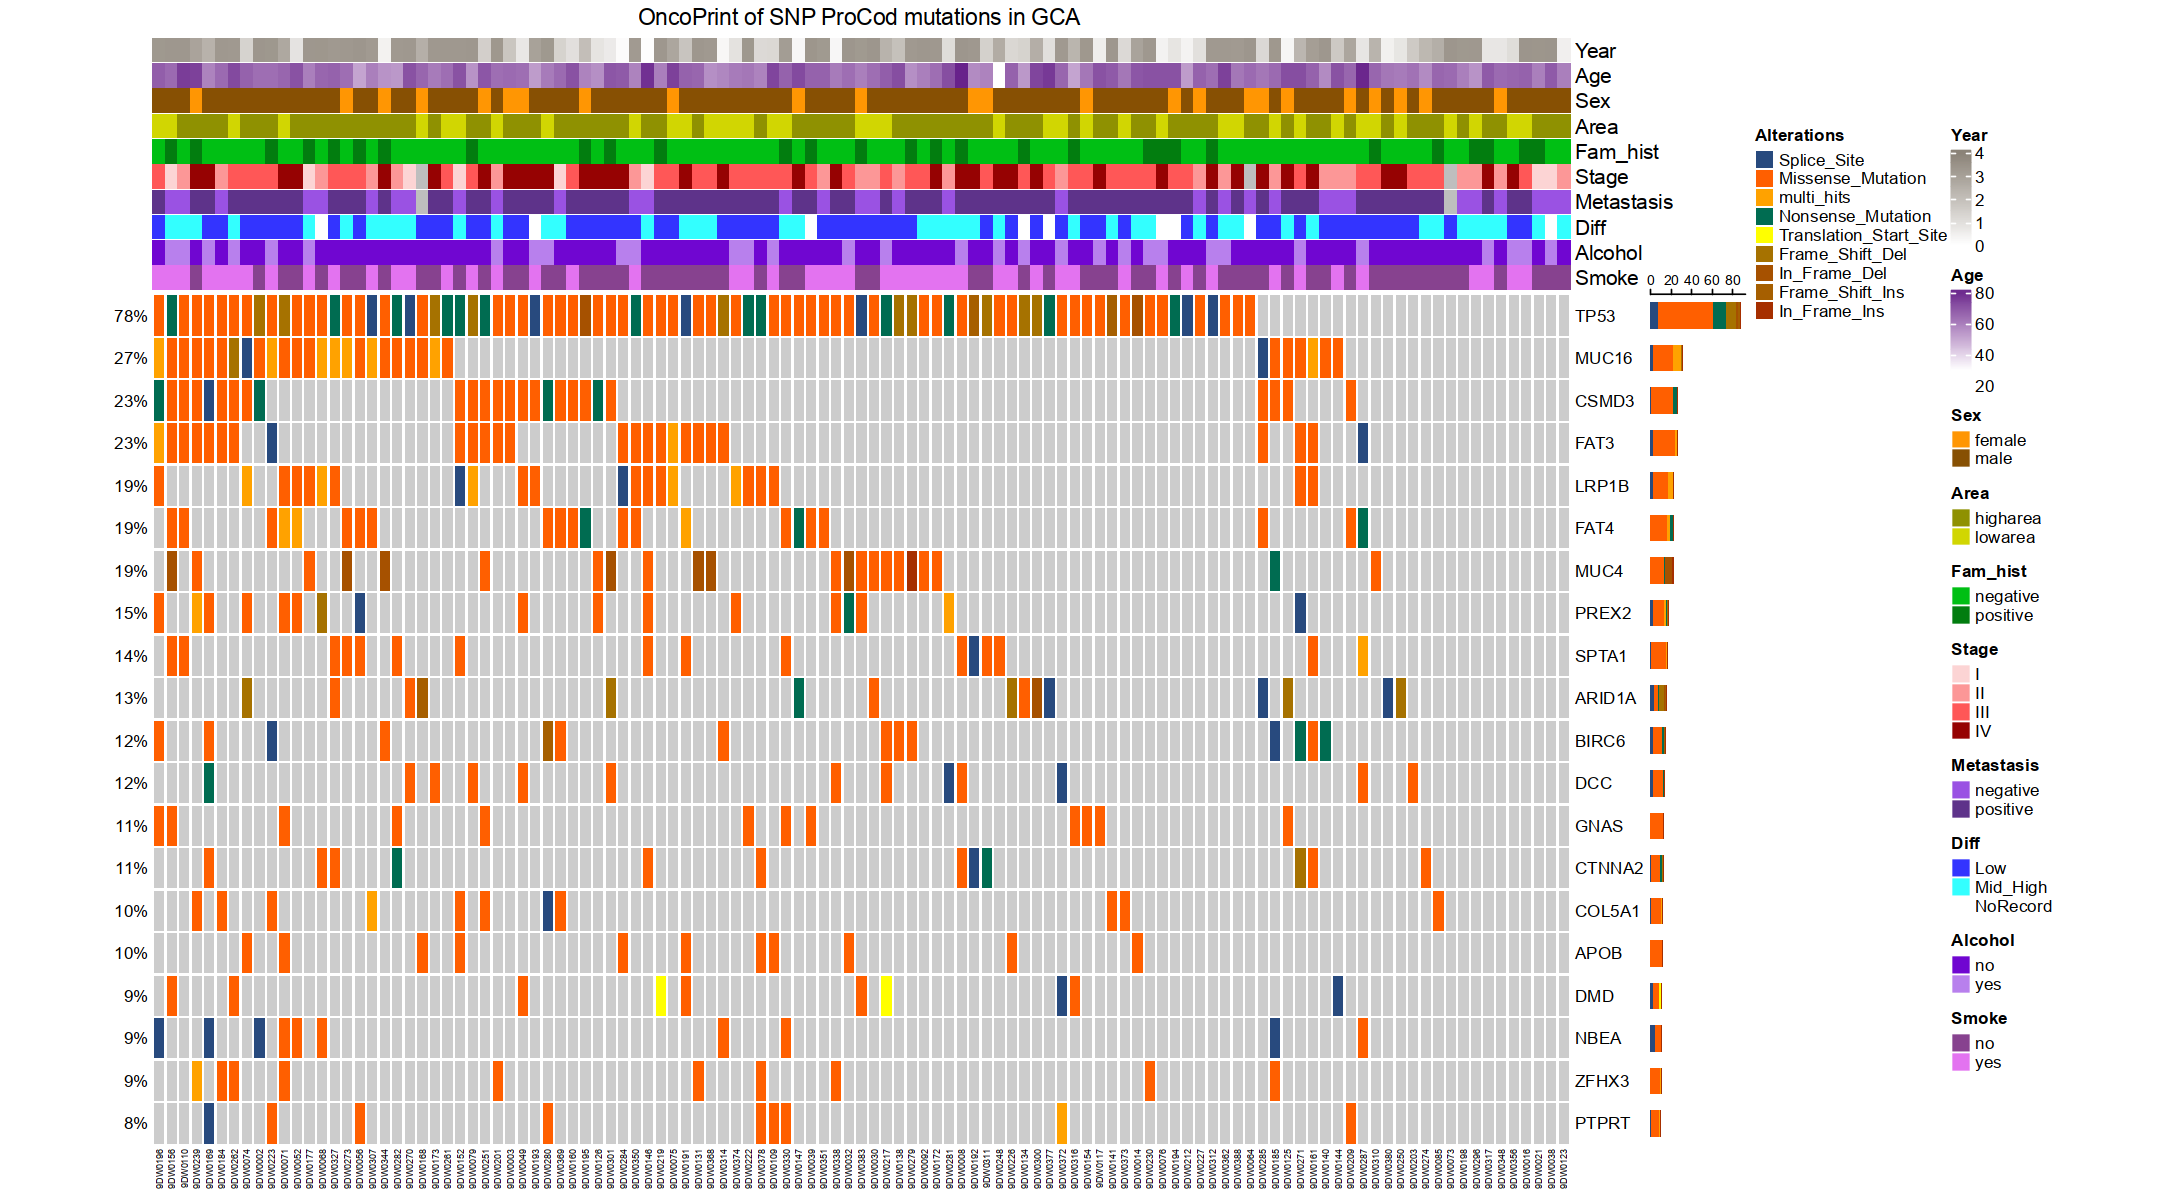

In [62]:
options(repr.plot.height=10,repr.plot.width=18)
p_cancer

In [67]:
pdf(file = "Mutation.cancergene.pdf",width = 18,height = 10)
p_cancer
dev.off()

png 
  2

In [64]:
high_cancer <- snp_mutation113_cancer[,phe_113[colnames(snp_mutation113_cancer),'group'] == 'High']
low_cancer <- snp_mutation113_cancer[,phe_113[colnames(snp_mutation113_cancer),'group'] == 'Low']
neg_cancer <- snp_mutation113_cancer[,phe_113[colnames(snp_mutation113_cancer),'group'] == 'negative']

high_cancer[high_cancer>0] = 1
high_cancer[!high_cancer>0] = 0
high_cancer <- mutate_all(high_cancer, function(x) as.numeric(x))

low_cancer[low_cancer>0] = 1
low_cancer[!low_cancer>0] = 0
low_cancer <- mutate_all(low_cancer, function(x) as.numeric(x))

neg_cancer[neg_cancer>0] = 1
neg_cancer[!neg_cancer>0] = 0
neg_cancer <- mutate_all(neg_cancer, function(x) as.numeric(x))

In [65]:
data_cancer_heatmap <- data.frame(high = rowSums(high_cancer)/ncol(high_cancer),low = rowSums(low_cancer)/ncol(low_cancer),
           neg = rowSums(neg_cancer)/ncol(neg_cancer))

In [66]:
head(snp_mutation_cancer)

,9DW0014,9DW0002,9DW0003,9DW0008,9DW0068,9DW0071,9DW0073,9DW0074,9DW0075,9DW0079,⋯,9DW0250,9DW0251,9DW0261,9DW0262,9DW0270,9DW0271,9DW0372,9DW0373,9DW0374,9DW0377
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TP53,In_Frame_Del,Frame_Shift_Del,Missense_Mutation,Missense_Mutation,Missense_Mutation,Frame_Shift_Del,,Missense_Mutation,Missense_Mutation,Frame_Shift_Del,⋯,,Nonsense_Mutation,Nonsense_Mutation,Missense_Mutation,Splice_Site,,Missense_Mutation,Missense_Mutation,Missense_Mutation,Nonsense_Mutation
MUC16,,Missense_Mutation,,,multi_hits,Missense_Mutation,,Splice_Site,,,⋯,,,Missense_Mutation,Frame_Shift_Del,Missense_Mutation,Missense_Mutation,,,,
CSMD3,,Nonsense_Mutation,Missense_Mutation,,,,,Missense_Mutation,,Missense_Mutation,⋯,,Missense_Mutation,,Missense_Mutation,,,,,,
FAT3,,,Missense_Mutation,,,,,,multi_hits,Missense_Mutation,⋯,,Missense_Mutation,,Missense_Mutation,,Missense_Mutation,,,,
LRP1B,,,,,multi_hits,Missense_Mutation,,multi_hits,multi_hits,multi_hits,⋯,,,,,,Missense_Mutation,,,multi_hits,
FAT4,,,,,,multi_hits,,,,,⋯,,,,,,,,,,


In [67]:
#pdf(file = "Mutation_all_threegroups.heatmap.pdf",height=10,width=12)
p_all_mutation_heatmap = oncoPrint(snp_mutation_cancer[1:15,], alter_fun = alter_fun,col=col, column_title = column_title,
            row_order = rownames(snp_mutation_cancer[1:15,]),
            right_annotation = NULL,
            show_row_names = FALSE,
         #   column_split = phe_128[colnames(snp_mutation_cancer),'group'],
            show_pct = TRUE,
            width = unit(25, "cm"),
            top_annotation = HeatmapAnnotation(
                            Age = phe_128$age,
                            Sex = phe_128$sex,  
                            Area  = phe_128$area,
                            Fam_hist = phe_128$family_history,
                            Stage = phe_128$Stage,
                            Metastasis = phe_128$Metastasis,
                            Diff = phe_128$differentiation ,   
                            Alcohol = phe_128$alcohol,
                            Smoke = phe_128$smoke,
                            col = col_anno
                            ), show_column_names = TRUE, column_names_gp = gpar(fontsize = 5),
             )+Heatmap(data_cancer_heatmap[1:15,],cluster_columns = FALSE,cluster_rows = FALSE, width = unit(1, "cm"))
#dev.off()

All mutation types: In_Frame_Del, Frame_Shift_Del, Missense_Mutation,
Nonsense_Mutation, multi_hits, Splice_Site, Frame_Shift_Ins,
In_Frame_Ins.

`alter_fun` is assumed vectorizable. If it does not generate correct
plot, please set `alter_fun_is_vectorized = FALSE` in `oncoPrint()`.

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


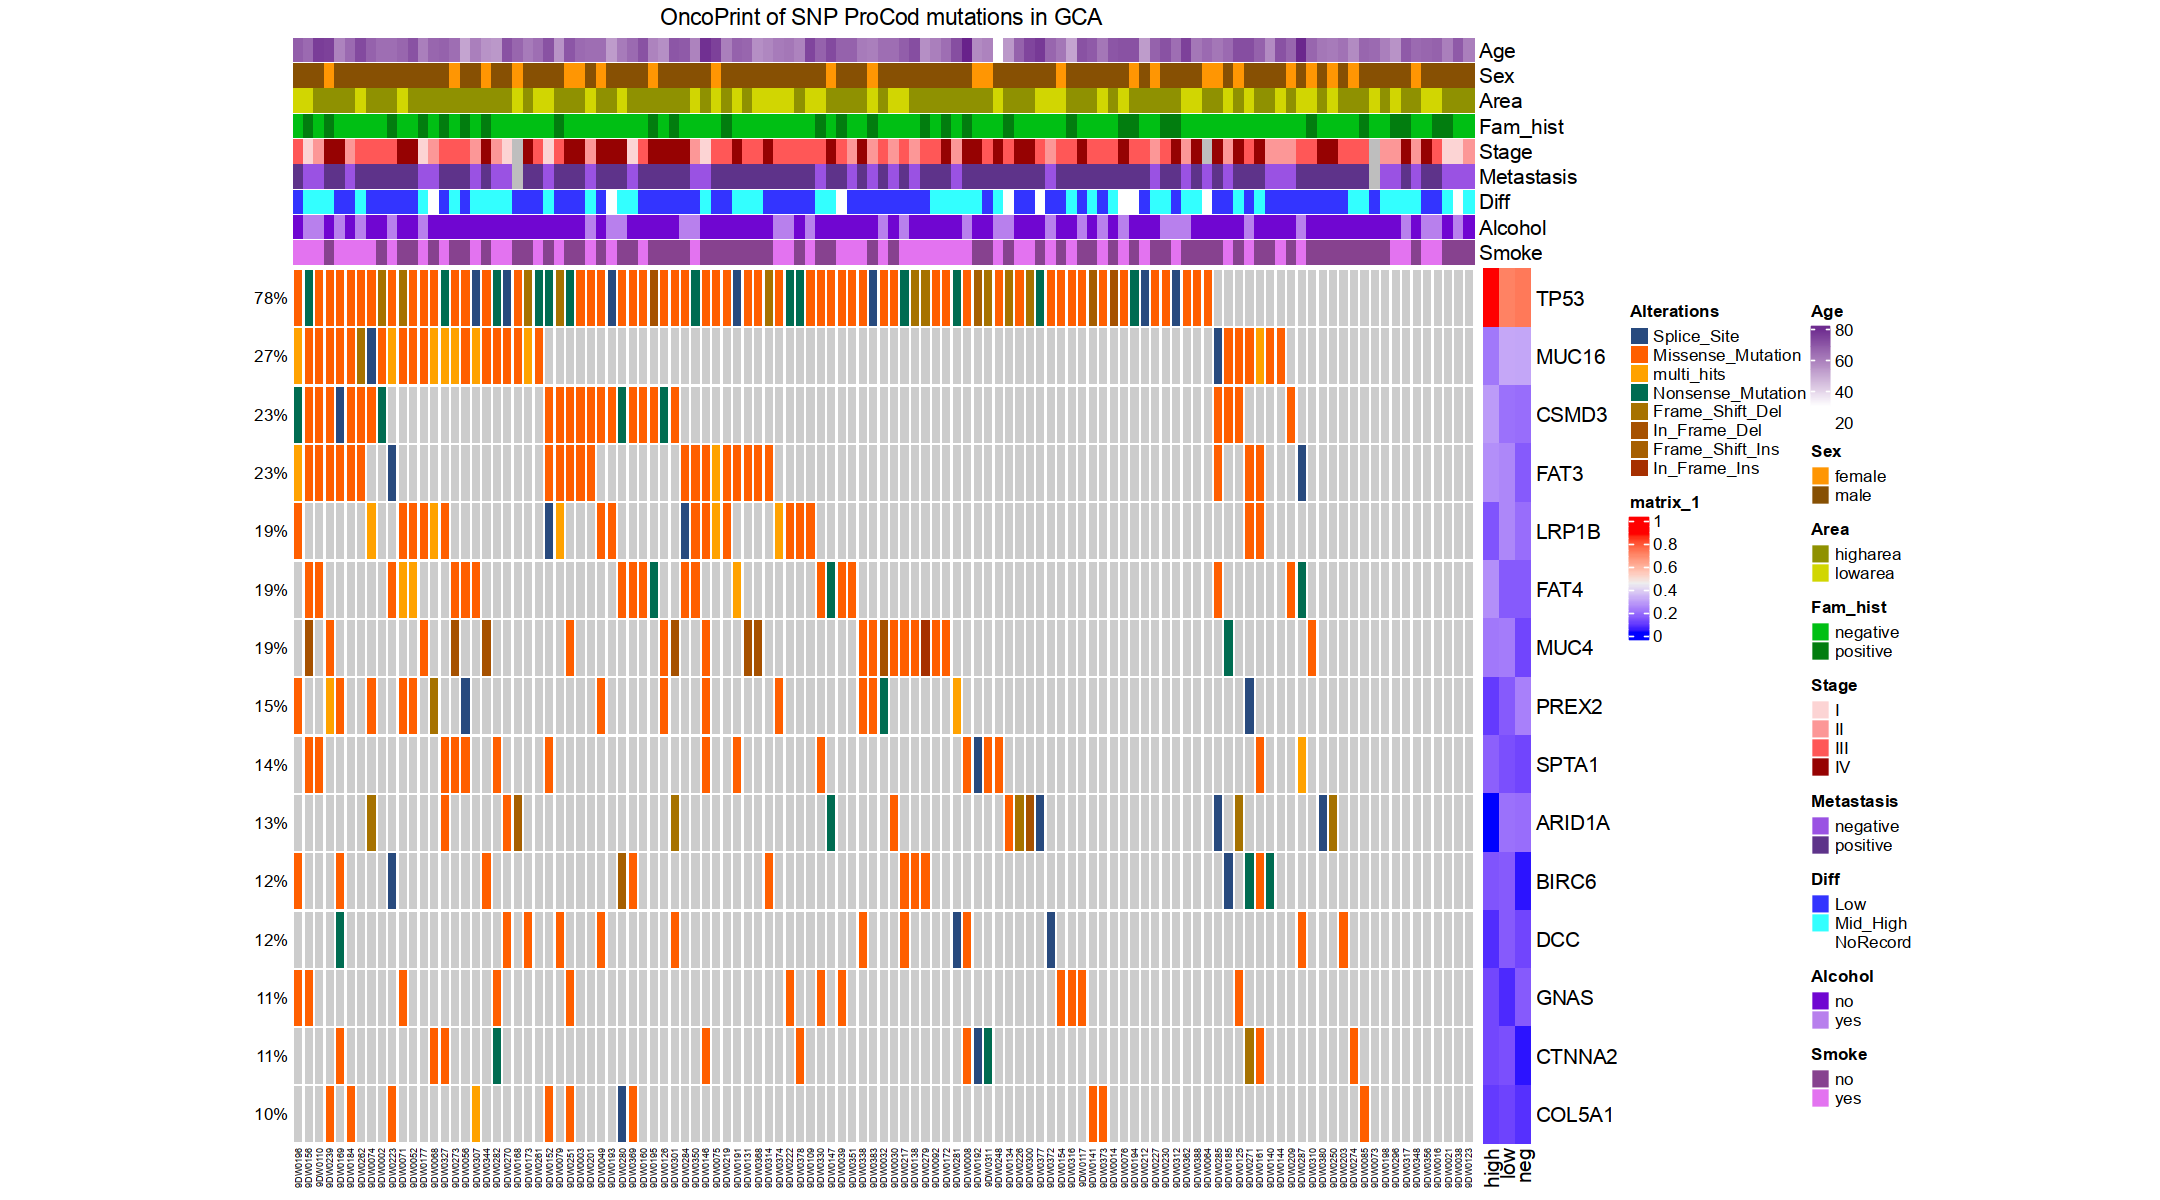

In [68]:
p_all_mutation_heatmap

In [244]:
pdf(file = "Mutation128_cancer_threegroups.heatmap.pdf",height=6,width=16)
options(repr.plot.height=8,repr.plot.width=14)
p_all_mutation_heatmap
dev.off()

png 
  2

In [80]:
high113 <- snp_mutation_cancer[,phe_113[colnames(snp_mutation_cancer),'group'] == 'High']
low113 <- snp_mutation_cancer[,phe_113[colnames(snp_mutation_cancer),'group'] == 'Low']
neg113 <- snp_mutation_cancer[,phe_113[colnames(snp_mutation_cancer),'group'] == 'negative']

high113[high113>0] = 1
high113[!high113>0] = 0
high113 <- mutate_all(high113, function(x) as.numeric(x))

low113[low113>0] = 1
low113[!low113>0] = 0
low113 <- mutate_all(low113, function(x) as.numeric(x))

neg113[neg113>0] = 1
neg113[!neg113>0] = 0
neg113 <- mutate_all(neg113, function(x) as.numeric(x))

In [81]:
data113_heatmap <- data.frame(high = rowSums(high113)/ncol(high113),low = rowSums(low113)/ncol(low113),
           neg = rowSums(neg113)/ncol(neg113))

In [87]:
phe_113$group %>% table()

.
    High      Low negative 
      42       45       26 

In [82]:
head(data113_heatmap)

,high,low,neg
,<dbl>,<dbl>,<dbl>
TP53,0.8809524,0.7111111,0.7307692
FAT3,0.2619048,0.2666667,0.1538462
MUC16,0.1666667,0.2666667,0.2692308
CSMD3,0.2619048,0.2000000,0.1923077
LRP1B,0.1428571,0.2444444,0.1923077
FAT4,0.2619048,0.1555556,0.1538462


In [ ]:
#pdf(file = "Mutation_all_threegroups.heatmap.pdf",height=10,width=12)
p_all_mutation_heatmap = oncoPrint(snp_mutation_cancer[1:20,], alter_fun = alter_fun,col=col, column_title = column_title,
            row_order = rownames(snp_mutation_cancer[1:20,]),
            right_annotation = NULL,
            show_row_names = FALSE,
            column_split = phe_128[colnames(snp_mutation_cancer),'group'],
            show_pct = TRUE,
            width = unit(25, "cm"),
            top_annotation = HeatmapAnnotation(
                            Age = phe_128$age,
                            Sex = phe_128$sex,  
                            Area  = phe_128$area,
                            Fam_hist = phe_128$family_history,
                            Stage = phe_128$Stage,
                            Metastasis = phe_128$Metastasis,
                            Diff = phe_128$differentiation ,   
                            Alcohol = phe_128$alcohol,
                            Smoke = phe_128$smoke,
                            col = col_anno
                            ), show_column_names = TRUE, column_names_gp = gpar(fontsize = 5),
             )+Heatmap(data113_heatmap[1:20,],cluster_columns = FALSE,cluster_rows = FALSE, width = unit(1, "cm"))
#dev.off()

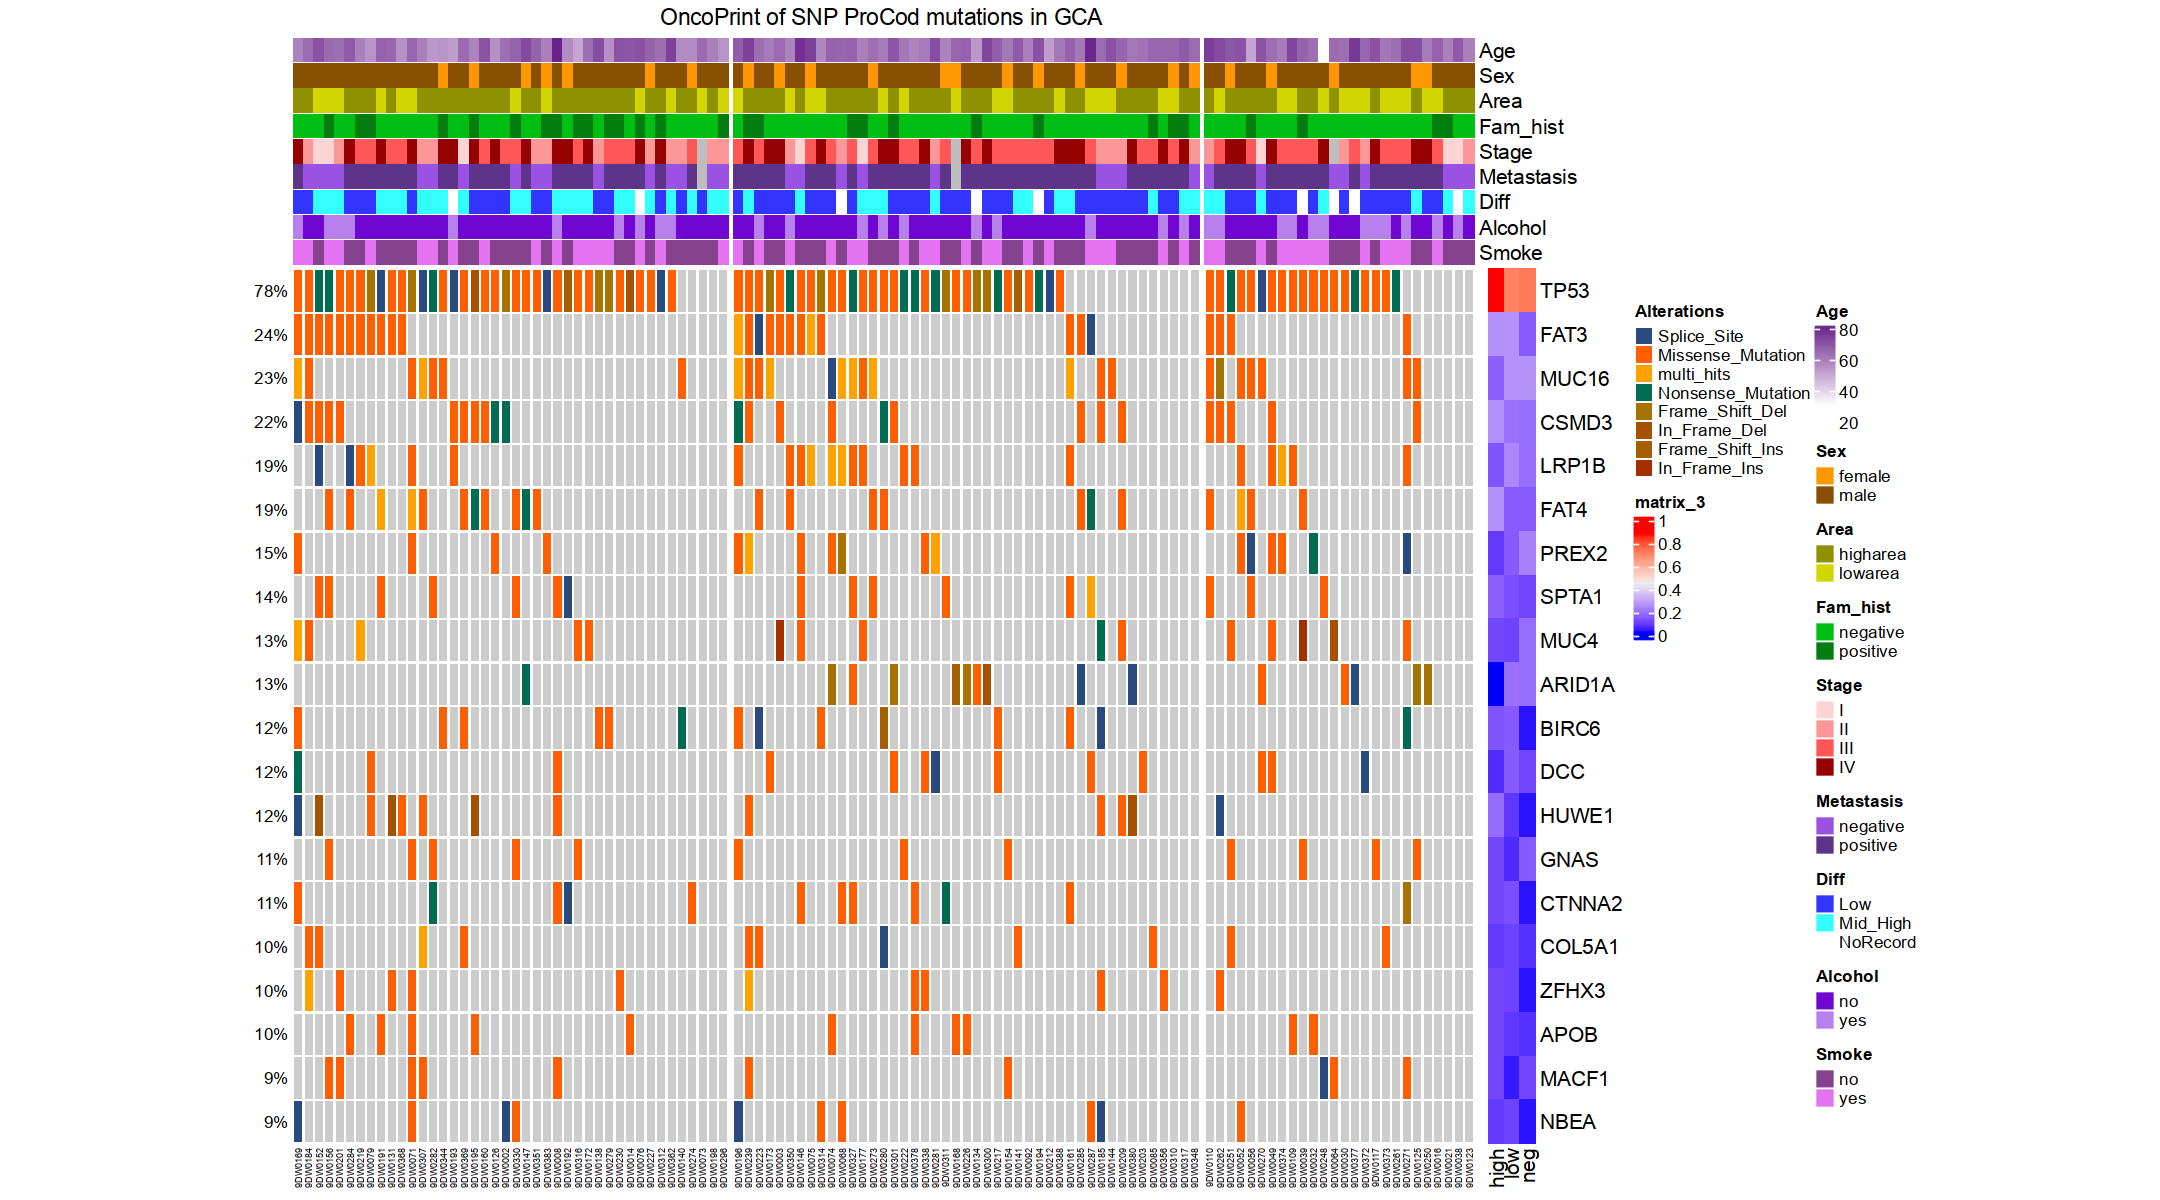

In [92]:
p_all_mutation_heatmap

In [93]:
pdf(file = "Mutation_cancergene_threegroups.heatmap.pdf",height=6,width=16)
options(repr.plot.height=8,repr.plot.width=14)
p_all_mutation_heatmap
dev.off()

png 
  2